In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


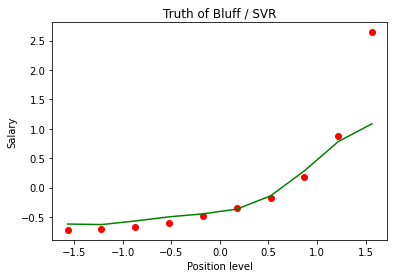

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import and split the data and classes
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Position_Salaries.csv")
print(dataset.head())
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, 2].values


# features scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(np.reshape(Y, (10,1)))

# Fitting Regression modelto the dataset
from sklearn.svm import SVR
regressor = SVR() # add this parametre kernel='rbf'
regressor.fit(X,Y)

# predicts a new result with polyn reg
y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[8.5]]))))

# Visualisation the regression result
plt.scatter(x=X, y=Y,color='red')
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth of Bluff / SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()